In [1]:
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import plotly.graph_objects as go
import scipy.stats as stats
from scipy.stats import pearsonr
from scipy.stats import f_oneway, ttest_ind
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from numpy.polynomial import Polynomial
import datetime as dt
import plotly.express as px
import plotly.io as pio
%matplotlib inline

In [2]:
circuits = pd.read_csv('..//Group_3_Project/F1/circuits.csv')
laptimes = pd.read_csv('../Group_3_Project/F1/lap_times.csv')
pitstops = pd.read_csv('../Group_3_Project/F1/pit_stops.csv')
seasons = pd.read_csv('../Group_3_Project/F1/seasons.csv' )
status = pd.read_csv('../Group_3_Project/F1/status.csv')
constructor_standings = pd.read_csv('../Group_3_Project/F1/constructor_standings.csv')
constructors = pd.read_csv('../Group_3_Project/F1/constructors.csv')
driver_standings = pd.read_csv('../Group_3_Project/F1/driver_standings.csv')                                    
drivers = pd.read_csv('../Group_3_Project/F1/drivers.csv')
races = pd.read_csv('../Group_3_Project/F1/races.csv')
constructor_results = pd.read_csv('../Group_3_Project/F1/constructor_results.csv')
results = pd.read_csv('../Group_3_Project/F1/results.csv')
qualifying = pd.read_csv('../Group_3_Project/F1/qualifying.csv')
pd.get_option("display.max_columns",None)

20

In [3]:
SP=pd.merge(results,races[['raceId','year','name','round','date']],on = 'raceId',how = 'left')
SP=pd.merge(SP,drivers[['driverId','driverRef','forename','surname','nationality','dob']],on='driverId',how='left')
pd.get_option("display.max_columns",None)
SP

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,statusId,year,name,round,date,driverRef,forename,surname,nationality,dob
0,1,18,1,1,22,1,1,1,1,10.0,...,1,2008,Australian Grand Prix,1,2008-03-16,hamilton,Lewis,Hamilton,British,1985-01-07
1,2,18,2,2,3,5,2,2,2,8.0,...,1,2008,Australian Grand Prix,1,2008-03-16,heidfeld,Nick,Heidfeld,German,1977-05-10
2,3,18,3,3,7,7,3,3,3,6.0,...,1,2008,Australian Grand Prix,1,2008-03-16,rosberg,Nico,Rosberg,German,1985-06-27
3,4,18,4,4,5,11,4,4,4,5.0,...,1,2008,Australian Grand Prix,1,2008-03-16,alonso,Fernando,Alonso,Spanish,1981-07-29
4,5,18,5,1,23,3,5,5,5,4.0,...,1,2008,Australian Grand Prix,1,2008-03-16,kovalainen,Heikki,Kovalainen,Finnish,1981-10-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26075,26081,1110,817,213,3,19,16,16,16,0.0,...,1,2023,Belgian Grand Prix,12,2023-07-30,ricciardo,Daniel,Ricciardo,Australian,1989-07-01
26076,26082,1110,858,3,2,18,17,17,17,0.0,...,1,2023,Belgian Grand Prix,12,2023-07-30,sargeant,Logan,Sargeant,American,2000-12-31
26077,26083,1110,807,210,27,0,18,18,18,0.0,...,1,2023,Belgian Grand Prix,12,2023-07-30,hulkenberg,Nico,Hülkenberg,German,1987-08-19
26078,26084,1110,832,6,55,4,\N,R,19,0.0,...,130,2023,Belgian Grand Prix,12,2023-07-30,sainz,Carlos,Sainz,Spanish,1994-09-01


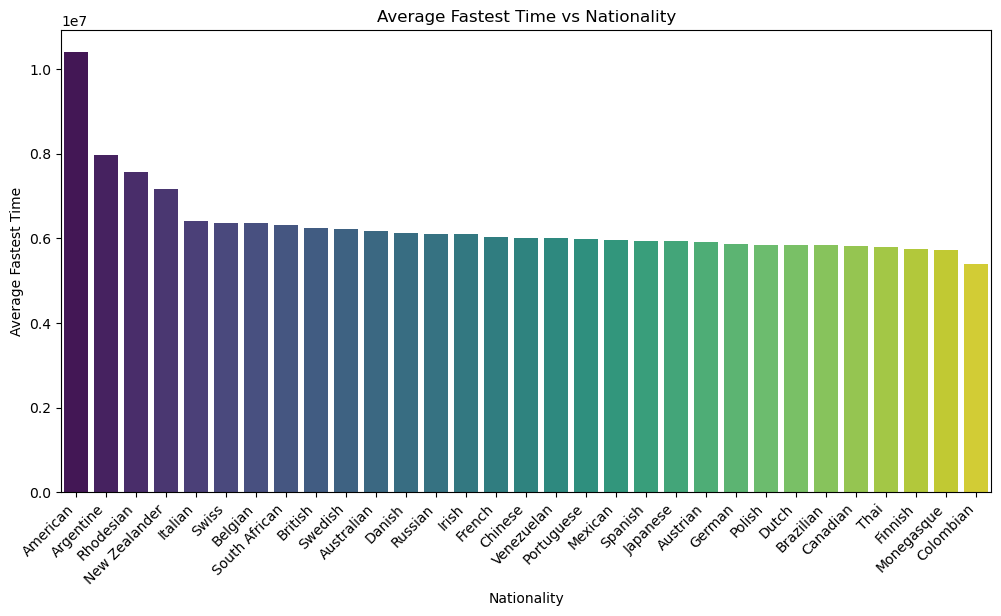

In [4]:
SP['milliseconds'] = pd.to_numeric(SP['milliseconds'], errors='coerce')
SP = SP.dropna(subset=['milliseconds'])
avg_fastest_time = SP.groupby('nationality')['milliseconds'].mean().reset_index()

# Sort the data by the average fastest time
avg_fastest_time = avg_fastest_time.sort_values(by='milliseconds', ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='nationality', y='milliseconds', data=avg_fastest_time, palette='viridis')
plt.title('Average Fastest Time vs Nationality')
plt.xlabel('Nationality')
plt.ylabel('Average Fastest Time')
plt.xticks(rotation=45, ha='right')
plt.show()


In [5]:
# Print summary statistics for fastestLap
print(SP['milliseconds'].describe())

count    7.250000e+03
mean     6.219500e+06
std      1.669483e+06
min      2.070710e+05
25%      5.397778e+06
50%      5.802742e+06
75%      6.415414e+06
max      1.509054e+07
Name: milliseconds, dtype: float64


In [11]:
# Convert 'fastestLap' to numeric, coerce errors to NaN
SP['milliseconds'] = pd.to_numeric(SP['milliseconds'], errors='coerce')

# Drop rows with NaN values in 'milliseconds'
SP = SP.dropna(subset=['milliseconds'])

# Group data by nationality
grouped_data = [SP['milliseconds'][SP['nationality'] == nationality] for nationality in ['American', 'Swiss']]

# ANOVA test
f_statistic, p_value_anova = f_oneway(*grouped_data)
print(f'ANOVA p-value: {p_value_anova}')

# T-test
t_statistic, p_value_ttest = ttest_ind(*grouped_data)
print(f'T-test p-value: {p_value_ttest}')

# Interpret the results
if p_value_ttest < 0.05:
    print("The difference in average fastest time between American and Swiss nationalities is statistically significant")
else:
    print("There is no significant difference in average fastest lap times between American and Swiss nationalities")


ANOVA p-value: 2.751756614382839e-20
T-test p-value: 2.751756614382878e-20
The difference in average fastest time between American and Swiss nationalities is statistically significant


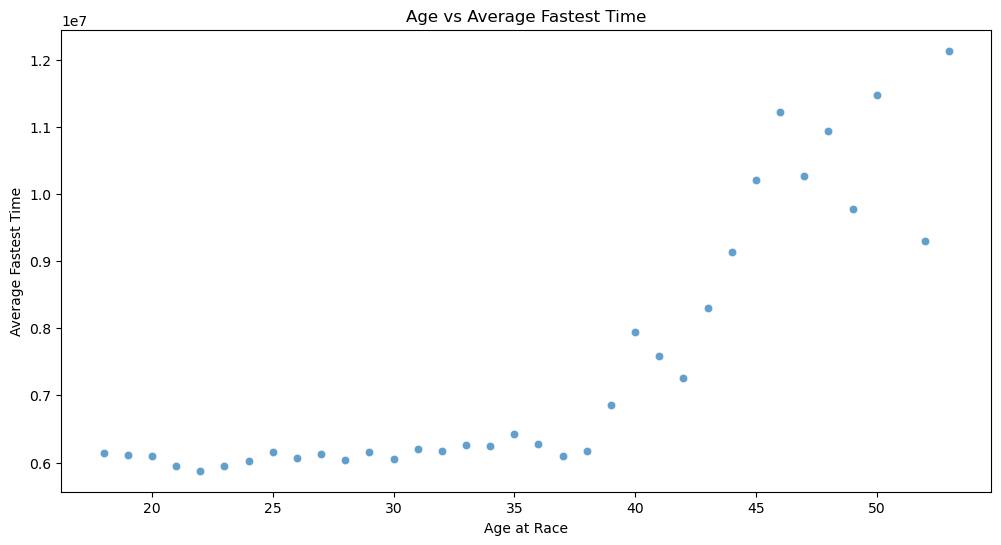

In [8]:
# Convert 'milliseconds' to numeric, coerce errors to NaN
SP['milliseconds'] = pd.to_numeric(SP['milliseconds'], errors='coerce')

# Drop rows with NaN values in 'milliseconds'
SP = SP.dropna(subset=['milliseconds'])

# Convert birthdate to datetime
SP['dob'] = pd.to_datetime(SP['dob'])

# Calculate age at the time of the race using .loc
SP.loc[:, 'age_at_race'] = (SP['year'] - SP['dob'].dt.year)

# Group the data by age at race and calculate the average fastest lap time
avg_fastest_time = SP.groupby('age_at_race')['milliseconds'].mean().reset_index()

# Sort the data by the average fastest time
avg_fastest_time = avg_fastest_time.sort_values(by='milliseconds', ascending=False)

# Create a scatter plot using avg_fastest_time DataFrame
plt.figure(figsize=(12, 6))
sns.scatterplot(x='age_at_race', y='milliseconds', data=avg_fastest_time, alpha=0.7)
plt.title('Age vs Average Fastest Time')
plt.xlabel('Age at Race')
plt.ylabel('Average Fastest Time')
plt.show()

In [9]:
# Calculate age at the time of the race using .loc
SP.loc[:, 'age_at_race'] = (SP['year'] - SP['dob'].dt.year)

# Group the data by age at race and calculate the average fastest time
avg_fastest_time = SP.groupby('age_at_race')['milliseconds'].mean().reset_index()

# Sort the data by the average fastest lap time
avg_fastest_time = avg_fastest_time.sort_values(by='milliseconds', ascending=False)

# Calculate the correlation between age and average fastest lap time
correlation_age_fastest_time, _ = pearsonr(avg_fastest_time['age_at_race'], avg_fastest_time['milliseconds'])

# Print analysis results
print(f"Correlation between age and average fastest time: {correlation_age_fastest_time:.2f}")
print("\nObservations:")
print("- A correlation coefficient of 0.85 indicates a strong positive correlation between age and average fastest lap time.") 
print("- I can see that as you get older and you get more experience the faster the time")

Correlation between age and average fastest time: 0.85

Observations:
- A correlation coefficient of 0.85 indicates a strong positive correlation between age and average fastest lap time.
- I can see that as you get older and you get more experience the faster the time
